# APLICACION DE KMEANS

# Test de Alerta sobre un noviazgo violento

**Información respecto a las 10 preguntas y sus valores:**

pregunta 1: Cuando no están juntos, ¿tu pareja te controla preguntándote con quién estás, dónde y qué estás haciendo mensajeando por celular?

pregunta 2: ¿Revisa los mensajes de tu celular o te pidió la contraseña de tu correo electrónico, Facebook o Instagram como “prueba de confianza”?

pregunta 3: ¿Te acusa de haber sido infiel o coquetear con otros/as?

pregunta 4: ¿Sentís que están permanentemente en tensión y que, hagas lo que hagas, se irrita o te culpabiliza de sus cambios de humor?

pregunta 5: ¿Le molesta que hagas actividades de manera independiente, como estudiar, trabajar, visitar amigos/as, ir al gimnasio o elegir quedarte sola/o en tu casa?

pregunta 6: ¿Sentís que te alejaste o perdiste contacto con amigos/as o familiares desde que estás en pareja?

pregunta 7: ¿Te dice cómo tenés que vestirte o cómo debe ser tu apariencia?

pregunta 8: ¿Menosprecia en público o en privado tus opiniones?

pregunta 9: ¿Te dice que todo lo que hacés está mal o que no servís para nada?

pregunta 10: ¿Te amenaza con lastimarse/te si no lo/la obedeces o si querés terminar la relación?


#### Información sobre las respuestas al test de Señales de Alerta en el noviazgo. Referencias: A="siempre" B="a veces" C="nunca"


In [322]:
# Análisis exploratorio y limpieza
import pandas as pd
import numpy as np

# Gráficos 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "dark")


# Standar Scaler
from sklearn.preprocessing import StandardScaler

## Análisis breve del dataset

In [323]:
data = pd.read_csv('resultados-del-test-febrero-octubre-2018.csv', sep=';')
data.head()

,FECHA,HORA,EDAD,GENERO,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10
0,13/02/2017,23:41,28,HOMBRE,PALERMO,B,B,B,B,B,B,B,B,B,B
1,13/02/2017,20:09,23,MUJER,BALVANERA,B,B,B,B,B,B,B,B,B,B
2,13/02/2017,20:07,22,MUJER,BALVANERA,A,A,A,A,A,A,A,A,B,C
3,13/02/2017,20:04,34,MUJER,VILLA PUEYRREDON,C,C,B,C,B,C,C,C,C,B
4,13/02/2017,19:34,31,MUJER,CABALLITO,C,C,C,C,C,C,C,C,C,C


In [324]:
print(f'Cantidad de filas y columnas:\n{data.shape}')

Cantidad de filas y columnas:
(11643, 15)


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11643 entries, 0 to 11642
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    11643 non-null  object
 1   HORA     11643 non-null  object
 2   EDAD     11643 non-null  object
 3   GENERO   11643 non-null  object
 4   BARRIO   11643 non-null  object
 5   PREG_1   11643 non-null  object
 6   PREG_2   11643 non-null  object
 7   PREG_3   11643 non-null  object
 8   PREG_4   11643 non-null  object
 9   PREG_5   11643 non-null  object
 10  PREG_6   11643 non-null  object
 11  PREG_7   11643 non-null  object
 12  PREG_8   11643 non-null  object
 13  PREG_9   11643 non-null  object
 14  PREG_10  11643 non-null  object
dtypes: object(15)
memory usage: 1.3+ MB


## 1) Limpieza del dataset

1.1) Datos repetidos.

1.2) Columnas que no nos sirvan.

1.3) Valores nulos o faltantes.

1.4) Cambiar el tipo de datos de la variable edad.

1.5) Analizamos los valores únicos de las preguntas y los cambiamos por valores numéricos. (0,1,2).

1.6) Cambiamos los valores de la variable GÉNERO a 0 y 1.

##### 1.1) Datos repetidos.

In [326]:
data_train = data

print(f'Filas y columnas sin eliminar duplicados:\n{data_train.shape}\n')
data_train.drop_duplicates(inplace=True)
print(f'Filas y columnas eliminando duplicados:\n{data_train.shape}\n')

Filas y columnas sin eliminar duplicados:
(11643, 15)

Filas y columnas eliminando duplicados:
(11625, 15)



##### 1.2) Columnas que no contribuyan para la aplicación de k-means.

Vamos a eliminar las columnas que no nos ayuden con el objetivo principal del análisis del dataset.

In [327]:
data.columns

Index(['FECHA', 'HORA', 'EDAD', 'GENERO', 'BARRIO', 'PREG_1', 'PREG_2',
       'PREG_3', 'PREG_4', 'PREG_5', 'PREG_6', 'PREG_7', 'PREG_8', 'PREG_9',
       'PREG_10'],
      dtype='object')

In [328]:
data_train = data.drop(columns=['FECHA','HORA','BARRIO'])
data_train.head(1)

,EDAD,GENERO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10
0,28,HOMBRE,B,B,B,B,B,B,B,B,B,B


##### 1.2) Valores nulos o faltantes.

Comprobemos si tenemos valores nulos en el dataset. En caso de que haya algunos, veamos cómo podemos manejarlos.

In [329]:
print(f'Valores nulos:\n{data_train.isna().sum()}')

Valores nulos:
EDAD       0
GENERO     0
PREG_1     0
PREG_2     0
PREG_3     0
PREG_4     0
PREG_5     0
PREG_6     0
PREG_7     0
PREG_8     0
PREG_9     0
PREG_10    0
dtype: int64


##### 1.4) Cambiamos el tipo de dato de la variable edad (objecto) a entero.

In [330]:
try:
    data_train['EDAD'] = data_train['EDAD'].astype('int')
except Exception as error:
    print(error)

invalid literal for int() with base 10: '<18'


In [331]:
menores_18 = data_train['EDAD'] == '<18'
menores_18.sum()

889

Si queremos cambiar la variable a enteros, primero debemos reemplazar o eliminar los valores que contengan: '<18'.
Descartamos la opción de eliminar las filas con esos datos porque sino perderíamos mucha información. Vamos a reemplazarlo por 18, ya que es el número más cercano de los menores de edad.

In [332]:
def edad(dataset):
    dataset['EDAD'].replace({'<18':18}, inplace=True)
    try:
        dataset['EDAD'] = dataset['EDAD'].astype('int')
    except Exception as error:
        print(error)
    finally:
        print(data_train.dtypes)
        
edad(data_train)

EDAD        int32
GENERO     object
PREG_1     object
PREG_2     object
PREG_3     object
PREG_4     object
PREG_5     object
PREG_6     object
PREG_7     object
PREG_8     object
PREG_9     object
PREG_10    object
dtype: object


##### 1.5) Analizando los valores únicos y reemplazandolos por numéricos.

In [333]:
variables = ['GENERO','PREG_1','PREG_2','PREG_3','PREG_4','PREG_5','PREG_6','PREG_7','PREG_8','PREG_9','PREG_10']

for i in variables:
    print(f'Valores únicos de la variable {i}\n{data_train[i].unique()}')

Valores únicos de la variable GENERO
['HOMBRE' 'MUJER' 'OTRO']
Valores únicos de la variable PREG_1
['B' 'A' 'C']
Valores únicos de la variable PREG_2
['B' 'A' 'C']
Valores únicos de la variable PREG_3
['B' 'A' 'C']
Valores únicos de la variable PREG_4
['B' 'A' 'C']
Valores únicos de la variable PREG_5
['B' 'A' 'C']
Valores únicos de la variable PREG_6
['B' 'A' 'C']
Valores únicos de la variable PREG_7
['B' 'A' 'C']
Valores únicos de la variable PREG_8
['B' 'A' 'C']
Valores únicos de la variable PREG_9
['B' 'C' 'A']
Valores únicos de la variable PREG_10
['B' 'C' 'A']


Reemplazamos los valores de la columna GÉNERO por numéricos con get dummies.

In [334]:
data_train = pd.get_dummies(data_train, columns=['GENERO'])
data_train.head(1)

,EDAD,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO
0,28,B,B,B,B,B,B,B,B,B,B,1,0,0


Ahora reemplazamos los valores en las columnas de preguntas. (A,B,C) => (0,1,2)

In [335]:
variables_preg = ['PREG_1','PREG_2','PREG_3','PREG_4','PREG_5','PREG_6','PREG_7','PREG_8','PREG_9','PREG_10']

for i in variables_preg:
    data_train[i].replace(['A','B','C'], [0,1,2], inplace=True)
        
data_train.head()

,EDAD,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO
0,28,1,1,1,1,1,1,1,1,1,1,1,0,0
1,23,1,1,1,1,1,1,1,1,1,1,0,1,0
2,22,0,0,0,0,0,0,0,0,1,2,0,1,0
3,34,2,2,1,2,1,2,2,2,2,1,0,1,0
4,31,2,2,2,2,2,2,2,2,2,2,0,1,0


**Conclusión de la limpieza de datos:**

1) Tenemos un total de 18 valores repetidos. Podemos llegar a pensar que los individuos respondieron a las preguntas de igual manera. Sin embargo, sería mucha coincidencia que sea en la misma fecha, horario y el mismo barrio.

2) Eliminamos las columnas fecha, hora y barrio ya que no determinan si alguien sufre violencia o no.

3) El dataset no tiene valores faltantes, por lo que no es necesario modificar nada.

4) Cambiamos la variable EDAD de object a int.

5) Por último, reemplazamos los valores categóricos por numéricos. Para la variable GÉNERO utilizamos get dummies que nos dividió en tres columnas:

    - GÉNERO HOMBRE
    
    - GÉNERO MUJER
    
    - GÉNERO OTRO
**(0 = NO, 1 = SI)**
    
5) En el caso de las preguntas, las referencias quedarian asi:

    - 0 = "SIEMPRE" 
    
    - 1 = "A VECES"
    
    - 2 = "NUNCA".


## 2) Análisis exploratorio (EDA)

### ¿Qué buscamos responder?

El dataset consta de encuestas a personas de diferente edad y sexo. El problema es que no tenemos una variable dependiente que nos diga si el individuo está sufriendo algún tipo de violencia durante la etapa del noviazgo. Nuestro objetivo es dividir a la población en 2 grupos. El primer grupo nos va a mostrar que su situación es normal y el segundo que debería mantenerse alerta o  que ya se está sufriendo violencia en la etapa del noviazgo.

Para esto utilizaremos el algoritmo de k-means. De esta manera tendremos dos clusters.

2.1) Observar cuántos individuos fueron encuestados según su género.

2.2) Análisis de las variables individualmente según el género.

2.3) Edad de la población que manejamos.

##### 2.1) Cantidad de individuos según el género.

0 = No, 1 = Si


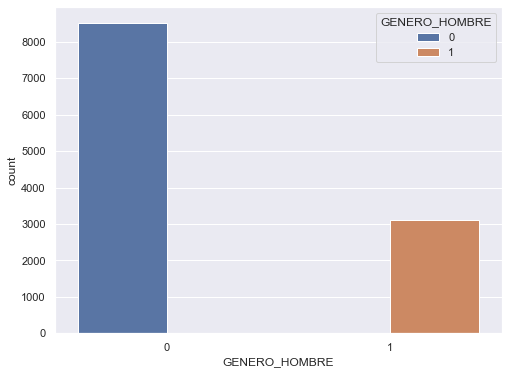

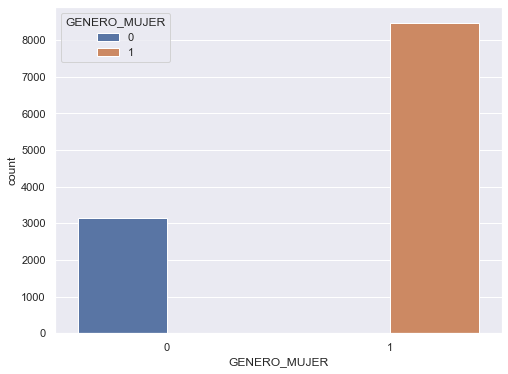

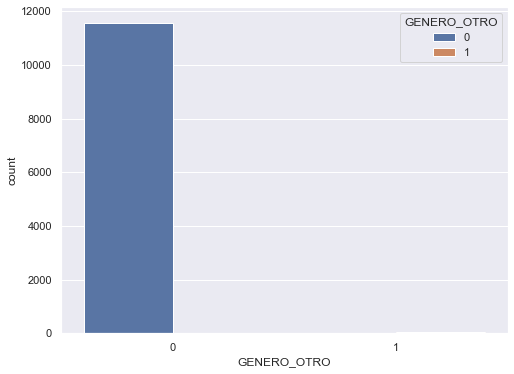

In [336]:
generos = ['GENERO_HOMBRE', 'GENERO_MUJER', 'GENERO_OTRO']

print('0 = No, 1 = Si')
for i in generos:
    plt.figure(figsize=(8,6))
    plt.grid(True)
    sns.countplot(data=data_train, x=i, hue=i)
    plt.show()

In [356]:
male = data_train[data_train['GENERO_HOMBRE']==1]
female = data_train[data_train['GENERO_MUJER']==1]
other = data_train[data_train['GENERO_OTRO']==1]

cantidad_genero = [male,female,other]

for i in cantidad_genero:
    print(f'{i.shape}')

(3097, 15)
(8478, 15)
(50, 15)


##### 2.2) Análisis de las respuestas según el género de los individuos.

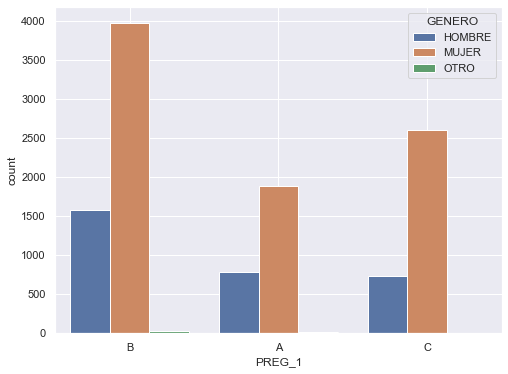

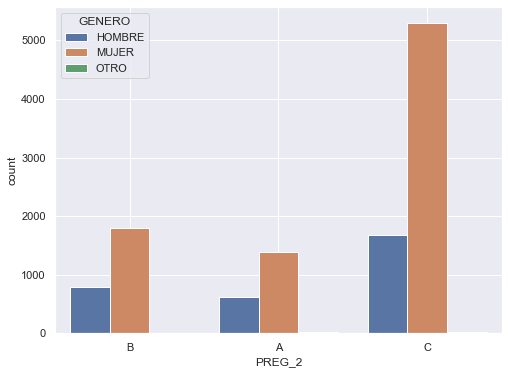

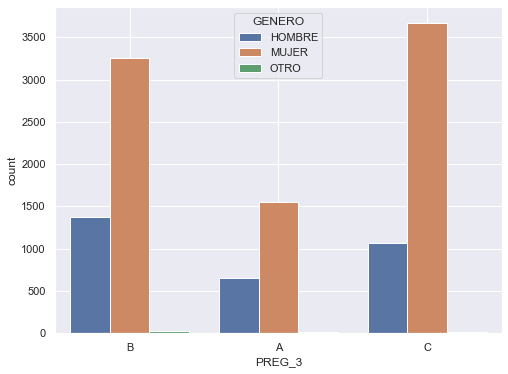

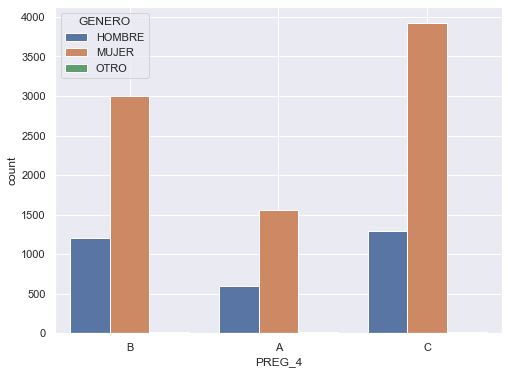

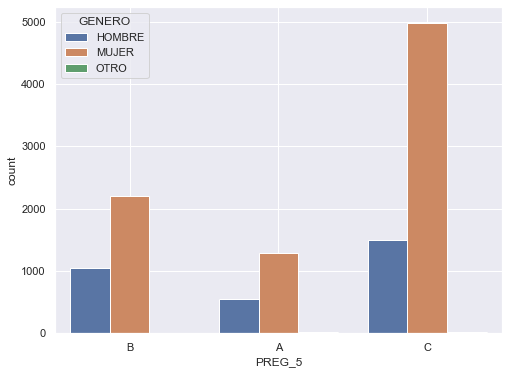

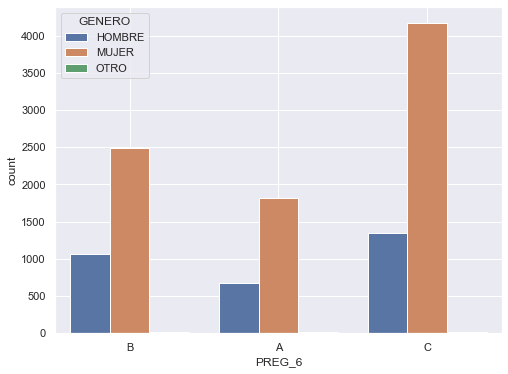

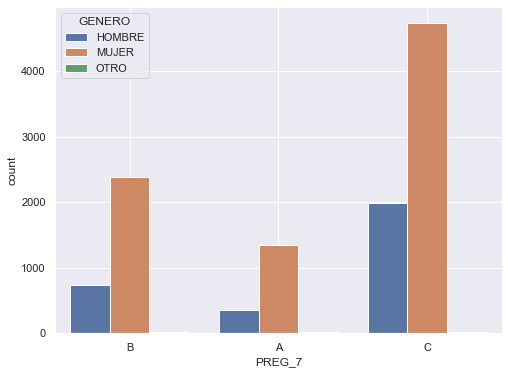

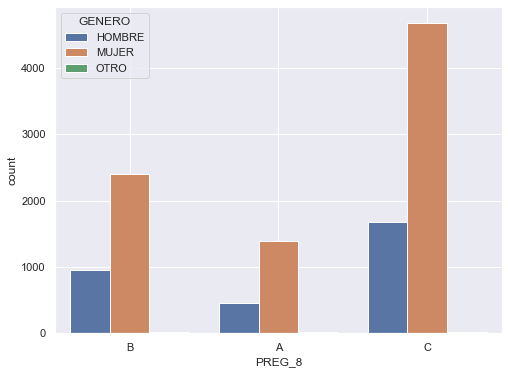

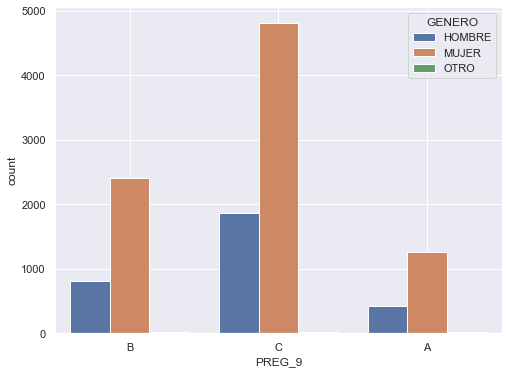

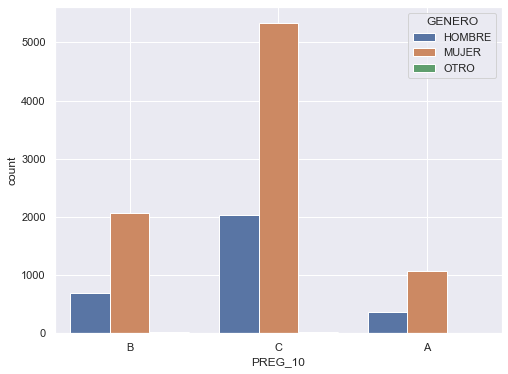

In [337]:
for i in variables_preg:
    plt.figure(figsize=(8,6))
    sns.countplot(data=data, x=i, hue='GENERO')
    plt.grid(True)
    plt.show()

##### 2.3) Edad de la población que manejamos.

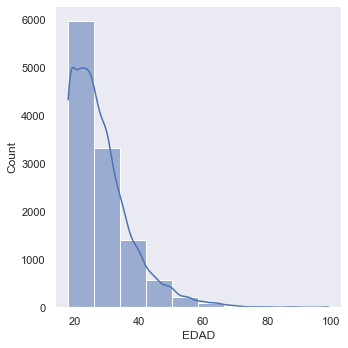

In [338]:
sns.displot(data=data_train, x='EDAD',bins=10, kind=('hist'), kde=True)
plt.show()

Manejamos una población con una gran cantidad de individuos de entre 18 y 28 años aproximadamente. A simple vista, en los primeros tres gráficos podemos ver que tenemos una mayor cantidad de mujeres que de hombres.

En el caso de las mujeres, la mayoría respondió a las preguntas con 'NUNCA', seguido por 'A VECES'. Y en los hombres, las respuestas están bastante parejas. No podemos decir nada del género 'OTRO', ya que no hay una gran cantidad de individuos.

## 3) Preparación de los datos y aplicación de kmeans.

3.1) Estandarizado de los datos con Standar Scaler.

3.2) Método del codo

3.3) Aplicación de k-means al dataset.

##### 3.1) Standar Scaler

In [339]:
data_scaler = StandardScaler().fit_transform(data_train)
data_scaler

array([[-0.03319376, -0.08011398, -0.55914035, ...,  1.65940729,
        -1.64133917, -0.06572408],
       [-0.571077  , -0.08011398, -0.55914035, ..., -0.60262481,
         0.6092586 , -0.06572408],
       [-0.67865365, -1.47222908, -1.85966188, ..., -0.60262481,
         0.6092586 , -0.06572408],
       ...,
       [-1.10896024,  1.31200112,  0.74138117, ..., -0.60262481,
         0.6092586 , -0.06572408],
       [ 2.22591585, -1.47222908, -1.85966188, ...,  1.65940729,
        -1.64133917, -0.06572408],
       [-0.03319376, -1.47222908, -0.55914035, ..., -0.60262481,
         0.6092586 , -0.06572408]])

##### 3.2) Codo de jambu

Con el método del codo, vamos a ver cuantos k (clusters) vamos a utilizar.

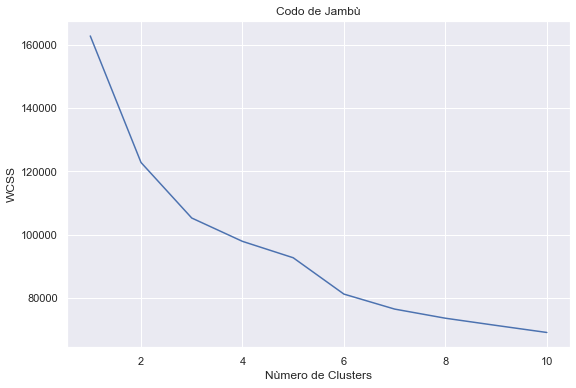

In [340]:
# Importo la libreria kmeans
from sklearn.cluster import KMeans


wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300).fit(data_scaler)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(9,6))
sns.lineplot(x = range(1,11), y = wcss)
plt.title('Codo de Jambù')
plt.grid(True)
plt.xlabel('Nùmero de Clusters')
plt.ylabel('WCSS')
plt.show()

##### 3.3) Generamos n clusters con K-means

In [341]:
# Vamos a generar dos clusters (o grupos) para poder dividir aquellos que ya sufren algun tipo de violencio y los que no.
kmeans = KMeans(n_clusters=2, max_iter=300)

# Lo aplicamos
kmeans.fit(data_scaler)

KMeans(n_clusters=2)

Los resultados de los clusters (0, 1) están dentro de labels_. Vamos a crear una nueva columna con estos grupos.

In [342]:
# Le agregamos los labels al dataframe que limpiamos y al original

data_train['Grupo'] = kmeans.labels_
data['Grupo'] = kmeans.labels_


data_train.head()

,EDAD,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO,Grupo
0,28,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,23,1,1,1,1,1,1,1,1,1,1,0,1,0,1
2,22,0,0,0,0,0,0,0,0,1,2,0,1,0,1
3,34,2,2,1,2,1,2,2,2,2,1,0,1,0,0
4,31,2,2,2,2,2,2,2,2,2,2,0,1,0,0


## 4) Análisis de los grupos generados

Para analizar los grupos, vamos a sacar una muestra de cada poblacion.

4.1) Visualización de la cantidad de población por grupos.

4.2) Análisis individual de cada grupo.

4.3) Comparación.

4.4) Conclusión del análisis.

##### 4.1) Veamos con un gráfico cuántos individuos hay en cada cluster.

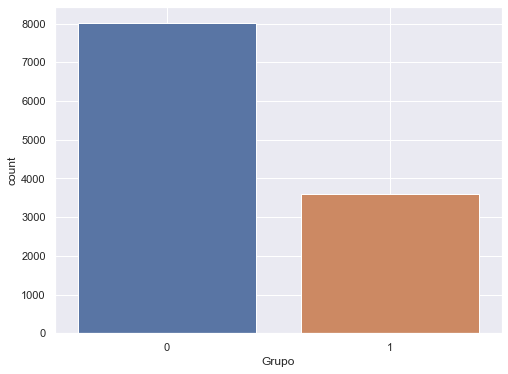

In [343]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_train, x='Grupo')
plt.grid(True)
plt.show()

##### 4.2) Análisis individual.

4.2.1) En primer lugar, vamos a crear un dataset para cada grupo. Luego tomaremos como muestra 50 de cada uno.

4.2.2) Uniremos los datasets nuevamente en uno.

4.2.3) Comparamos cómo respondieron cada grupo a las preguntas.

##### 4.2.1) Creamos un dataset para cada grupo y tomamos una muestra de 50 individuos.

In [352]:
# Primero dividimos los grupos.
# Utilizamos el dataset original ya que contiene los sexos en una sola variable (genero).

grupo_0 = data[data['Grupo']==0]
grupo_1 = data[data['Grupo']==1]

In [353]:
grupos = [grupo_0, grupo_1]


for i in grupos:
    print(f'{i.shape}')

(8025, 16)
(3600, 16)


Vamos a tomar una muestra de 50 individuos de cada grupo para comparar las respuestas a las preguntas.

In [354]:
grupo_0 = grupo_0.iloc[0:50]
grupo_1 = grupo_1.iloc[0:50]

##### 4.2.2) Unimos los dataset en uno solo.

In [347]:
df_grupos = pd.concat([grupo_0,grupo_1], axis=0)
df_grupos.shape

(100, 16)

In [348]:
df_grupos.sample(5)

,FECHA,HORA,EDAD,GENERO,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,Grupo
39,14/02/2017,19:42,30,HOMBRE,CONSTITUCION,C,C,C,C,C,C,C,C,C,A,0
58,14/02/2017,18:16,28,HOMBRE,PALERMO,A,A,A,A,A,A,A,A,A,A,1
71,14/02/2017,09:57,25,HOMBRE,OTRO,C,C,C,C,C,C,C,C,C,C,0
38,14/02/2017,19:51,34,MUJER,VILLA LURO,B,C,C,B,C,B,C,B,B,B,0
52,14/02/2017,18:42,25,MUJER,ALMAGRO,B,C,C,B,B,C,C,A,A,A,1


##### 4.2.3) Comparación entre las respuestas de los grupos.

In [349]:
for i in variables_preg:
    df_grupos[i].replace(['A','B','C'],["SIEMPRE","A VECES","NUNCA"], inplace=True)

In [350]:
edad(df_grupos)

EDAD             int32
PREG_1           int64
PREG_2           int64
PREG_3           int64
PREG_4           int64
PREG_5           int64
PREG_6           int64
PREG_7           int64
PREG_8           int64
PREG_9           int64
PREG_10          int64
GENERO_HOMBRE    uint8
GENERO_MUJER     uint8
GENERO_OTRO      uint8
Grupo            int32
dtype: object


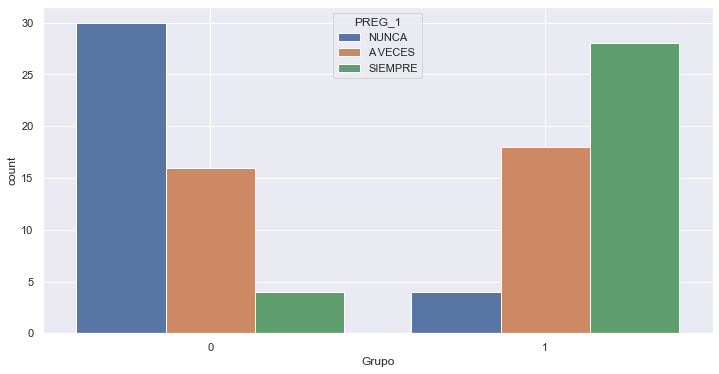

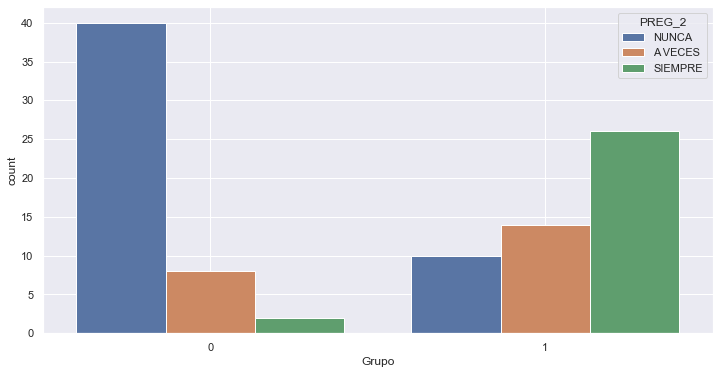

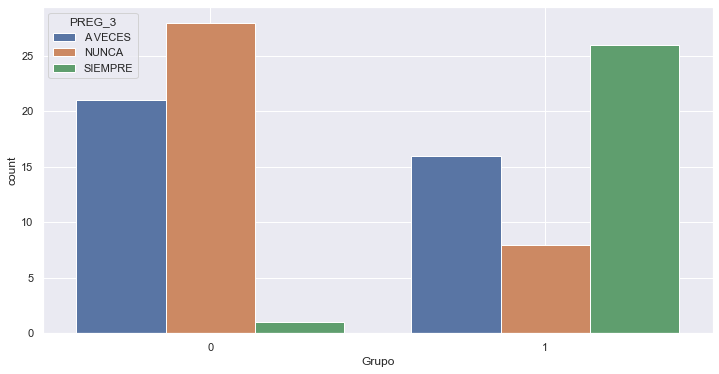

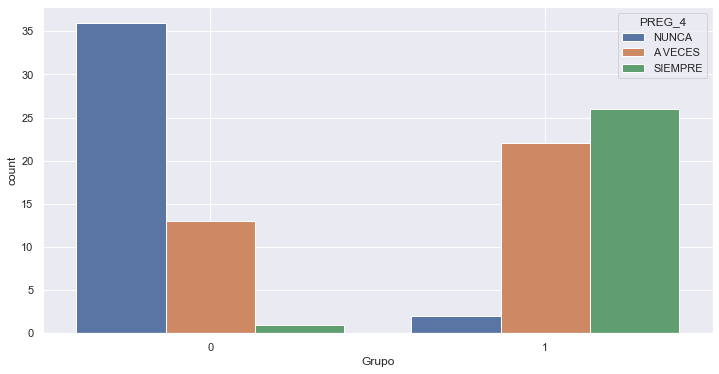

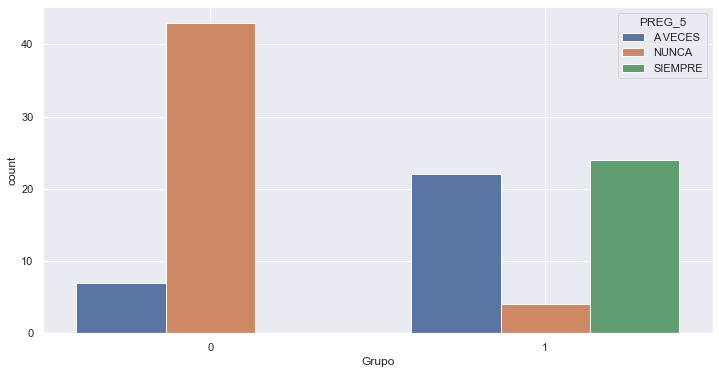

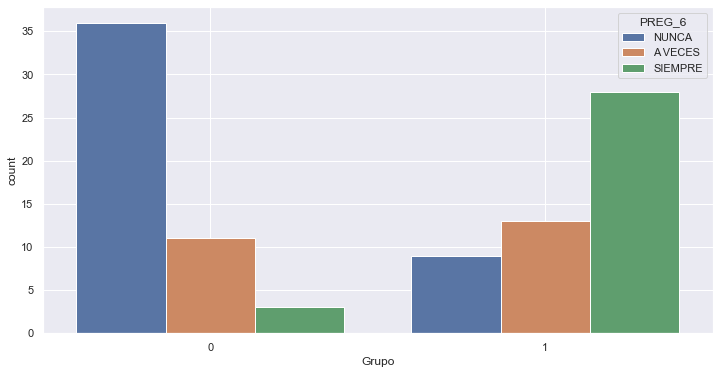

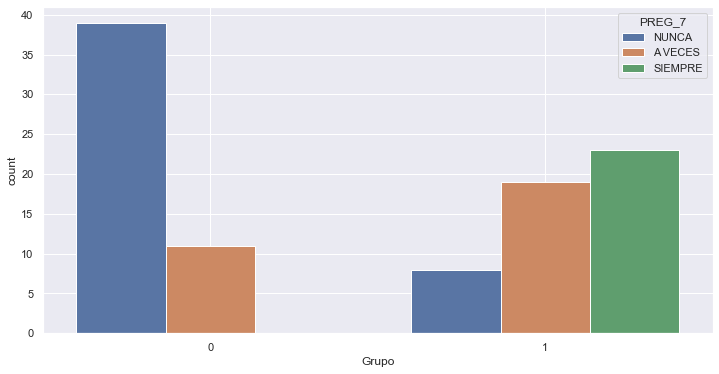

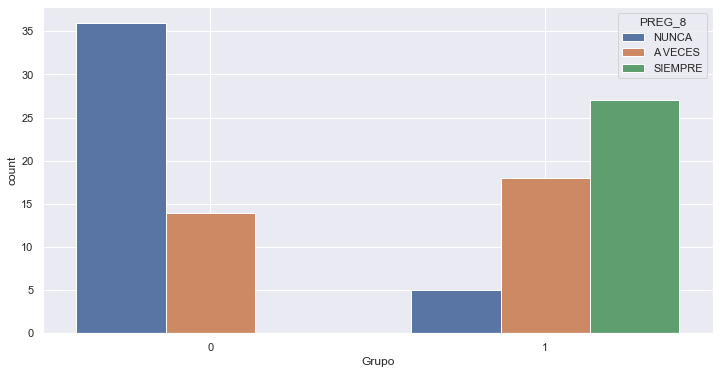

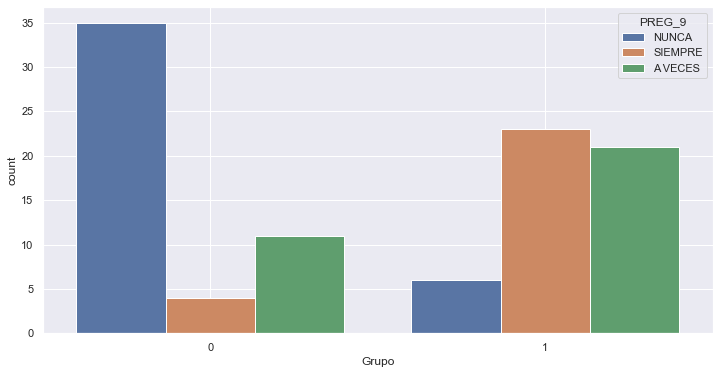

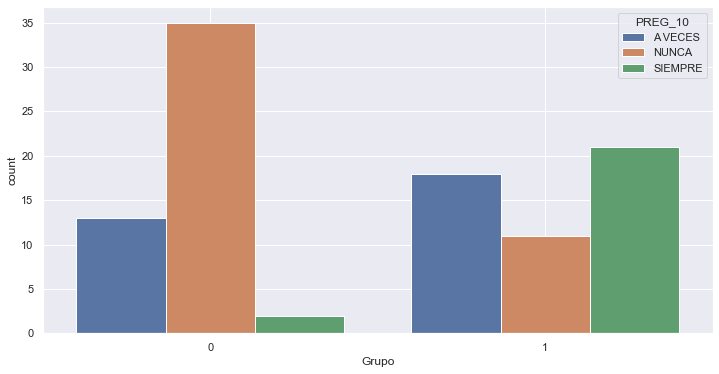

In [351]:
for i in variables_preg:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df_grupos, x='Grupo', hue=i)
    plt.grid(True)
    plt.show()

En conclusión, tenemos un dataset con una población de 11625 individuos. Contamos con casi 8478 mujeres, 3097 hombres y 50 otros. Como el dataset no está etiquetado (no tenemos una variable dependiente), generamos un algoritmo de aprendizaje no supervisado. En este caso, k means.

Si bien sabemos que las mujeres son mayoría, podemos ver en los gráficos que, al igual que los hombres, respondieron una gran cantidad de veces con *NUNCA* o *A VECES*.

Al separar los datos en dos grupos, vemos que aquellos que pertenecen al grupo 0, tienen menos probabilidades de sufrir algún tipo de violencia. Sin embargo, aquellos que pertenecen al grupo 1 deberían mantener un sentido de alerta. Sus respuestas demuestran que la mayoría de las veces contestan **'A VECES'** o **'SIEMPRE'**.
Al final, tenemos una cantidad de 8025 individuos que pertenecen al grupo 0 y un total de 3600 al grupo 1.